# Linear Regression — Gradient Descent

In Day 2, linear regression was solved using a closed-form solution.
While exact, that approach does not scale due to matrix inversion.

In this notebook, we implement **Gradient Descent** — an iterative
optimization method that learns parameters progressively by minimizing
a cost function.


## Mean Squared Error (MSE)

Residuals from Day 1 describe error at the level of individual data points.
To optimize a model, we need a **single scalar value** representing total error.

The Mean Squared Error cost function is defined as:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

Why MSE:
- Squares remove sign ambiguity
- Larger errors are penalized more
- The function is smooth and convex for linear regression

Each pair $(w, b)$ corresponds to one height on the cost surface.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## Dataset

We reuse a simple one-dimensional dataset to make optimization behavior
easy to visualize.


In [2]:
X = np.linspace(0, 10, 30).reshape(-1, 1)

true_w = 2.0
true_b = 1.0

noise = np.random.normal(0, 1.0, size=X.shape[0])
y = true_w * X.flatten() + true_b + noise


## Cost Function Implementation

The cost aggregates residuals into a single scalar value.
Gradient Descent will attempt to reduce this value step by step.


In [3]:
def compute_mse(y_hat, y):
    return np.mean((y_hat - y) ** 2)


## Gradients of the Cost Function

To minimize the cost, we need to know how it changes with respect to
the parameters.

The gradients indicate:
- direction of steepest increase
- magnitude of sensitivity

Gradient Descent updates parameters by moving **against** the gradient.


In [4]:
def compute_gradients(X, y, y_hat):
    n = len(y)
    residuals = y_hat - y
    dw = (2 / n) * X.T @ residuals
    db = (2 / n) * np.sum(residuals)
    return dw.item(), db


## Batch Gradient Descent Training Loop

At each iteration:
1. Predict outputs
2. Compute cost
3. Compute gradients
4. Update parameters

For linear regression, the cost surface is convex, so the loss
should decrease monotonically for a suitable learning rate.


In [11]:
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 200

loss_history = []

for epoch in range(epochs):
    y_hat = w * X.flatten() + b
    loss = compute_mse(y_hat, y)
    loss_history.append(loss)

    dw, db = compute_gradients(X, y, y_hat)

    w -= learning_rate * dw
    b -= learning_rate * db


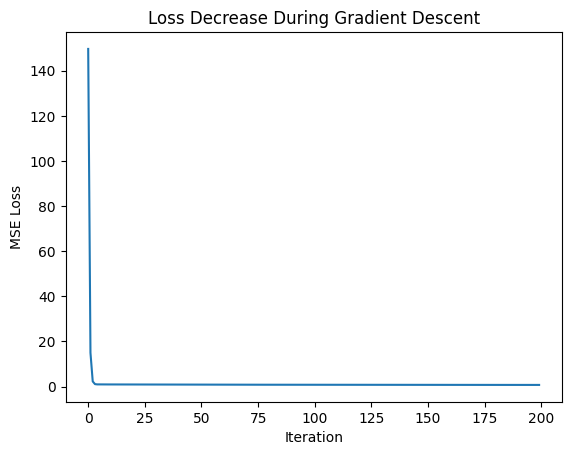

In [12]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Decrease During Gradient Descent")
plt.show()


The decreasing loss confirms that Gradient Descent is moving parameters
toward the minimum of the cost surface.


## Learning Rate Experiments

The learning rate controls step size:
- Too small → slow convergence
- Appropriate → stable convergence
- Too large → divergence or oscillation


In [7]:
def run_gd(lr):
    w, b = 0.0, 0.0
    losses = []

    for _ in range(100):
        y_hat = w * X.flatten() + b
        loss = compute_mse(y_hat, y)
        losses.append(loss)

        dw, db = compute_gradients(X, y, y_hat)
        w -= lr * dw
        b -= lr * db

    return losses


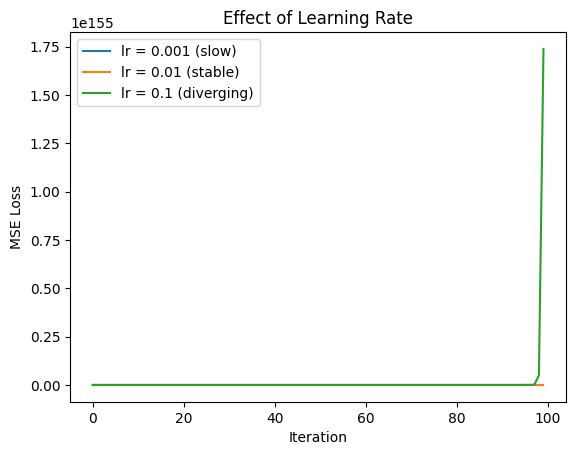

In [8]:
plt.plot(run_gd(0.001), label="lr = 0.001 (slow)")
plt.plot(run_gd(0.01), label="lr = 0.01 (stable)")
plt.plot(run_gd(0.1), label="lr = 0.1 (diverging)")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Effect of Learning Rate")
plt.show()


## Notes on Optimization

- Gradient Descent performs better when features are on similar scales
- Feature scaling will be introduced in later phases
- Early stopping can prevent unnecessary computation once convergence is reached


## Summary

- Residuals were aggregated into a scalar cost (MSE)
- Gradients were derived and implemented in vectorized form
- Batch Gradient Descent was used to minimize the cost
- Learning rate was shown to control convergence behavior

This replaces matrix inversion with scalable iterative optimization.
